# **Metrics and Results - SSCS - K-Fold**

Developed by André Paiva

Based on papers by Helena Cuesta and Emilia Gómez

In [50]:
import numpy as np
import pandas as pd
import va_plots

In [51]:
TRAIN = 2
FOLDS = 5

In [52]:
data_agg_sscs = []

for i in range(1, FOLDS+1):
    metrics_dir = './Evaluation_Data/mask_voas_v2_treino' + str(TRAIN) + '_kfold_' + str(i) + '.h5'
    mix_metrics, sop_metrics, alto_metrics, ten_metrics, bass_metrics = va_plots.metrics_load_precomputed(metrics_dir)
    data_agg_sscs.append({"Voice": "Soprano", "Fold": i, "Mean": sop_metrics["F-Measure"].agg('mean'), "Std": sop_metrics["F-Measure"].agg('std')})
    data_agg_sscs.append({"Voice": "Alto", "Fold": i, "Mean": alto_metrics["F-Measure"].agg('mean'), "Std": alto_metrics["F-Measure"].agg('std')})
    data_agg_sscs.append({"Voice": "Tenor", "Fold": i, "Mean": ten_metrics["F-Measure"].agg('mean'), "Std": ten_metrics["F-Measure"].agg('std')})
    data_agg_sscs.append({"Voice": "Bass", "Fold": i, "Mean": bass_metrics["F-Measure"].agg('mean'), "Std": bass_metrics["F-Measure"].agg('std')})

df_agg_sscs = pd.DataFrame(data_agg_sscs)
agg_proc = df_agg_sscs.melt(id_vars=["Fold", "Voice"])
agg_proc = agg_proc.pivot(index=["Fold"], columns=["Voice", "variable"])
agg_proc.loc['mean'] = agg_proc.mean()
agg_proc = agg_proc.round(2)
agg_proc

value                                            
Voice    Soprano  Alto Tenor  Bass Soprano  Alto Tenor  Bass
variable    Mean  Mean  Mean  Mean     Std   Std   Std   Std
Fold                                                        
1           0.93  0.86  0.86  0.93     0.1  0.14  0.13  0.09
2           0.93  0.86  0.86  0.93     0.1  0.14  0.13  0.08
3           0.93  0.86  0.86  0.93     0.1  0.14  0.13  0.08
4           0.93  0.86  0.86  0.93     0.1  0.14  0.13  0.08
5           0.92  0.85  0.86  0.93     0.1  0.14  0.13  0.08
mean        0.93  0.86  0.86  0.93     0.1  0.14  0.13  0.08

In [53]:
sop_metrics["F-Measure"].agg('std')

0.10455605524439397

In [54]:
def plot_val_metrics(train, fold):
    log_folder = 'mask_voas_v2'
    model_name = 'MaskVoasCNNv2'
    metrics_dir = './Evaluation_Data/val_' + log_folder + '_treino' + str(train) + '_kfold_' + str(fold) + '.h5'
    mix_metrics, sop_metrics, alto_metrics, ten_metrics, bass_metrics = va_plots.metrics_load_precomputed(metrics_dir)
    va_plots.evaluation_boxplots(sop_metrics,
                                alto_metrics,
                                ten_metrics,
                                bass_metrics,
                                title=model_name + ' (KFold) - Fold ' + str(fold) + ' - Validation Fold')

In [55]:
def plot_test_metrics(train, fold):
    log_folder = 'mask_voas_v2'
    model_name = 'MaskVoasCNNv2'
    metrics_dir = './Evaluation_Data/' + log_folder + '_treino' + str(train) + '_kfold_' + str(fold) + '.h5'
    mix_metrics, sop_metrics, alto_metrics, ten_metrics, bass_metrics = va_plots.metrics_load_precomputed(metrics_dir)
    va_plots.evaluation_boxplots(sop_metrics,
                                alto_metrics,
                                ten_metrics,
                                bass_metrics,
                                title=model_name + ' (KFold) - Fold ' + str(fold) + ' - Test')

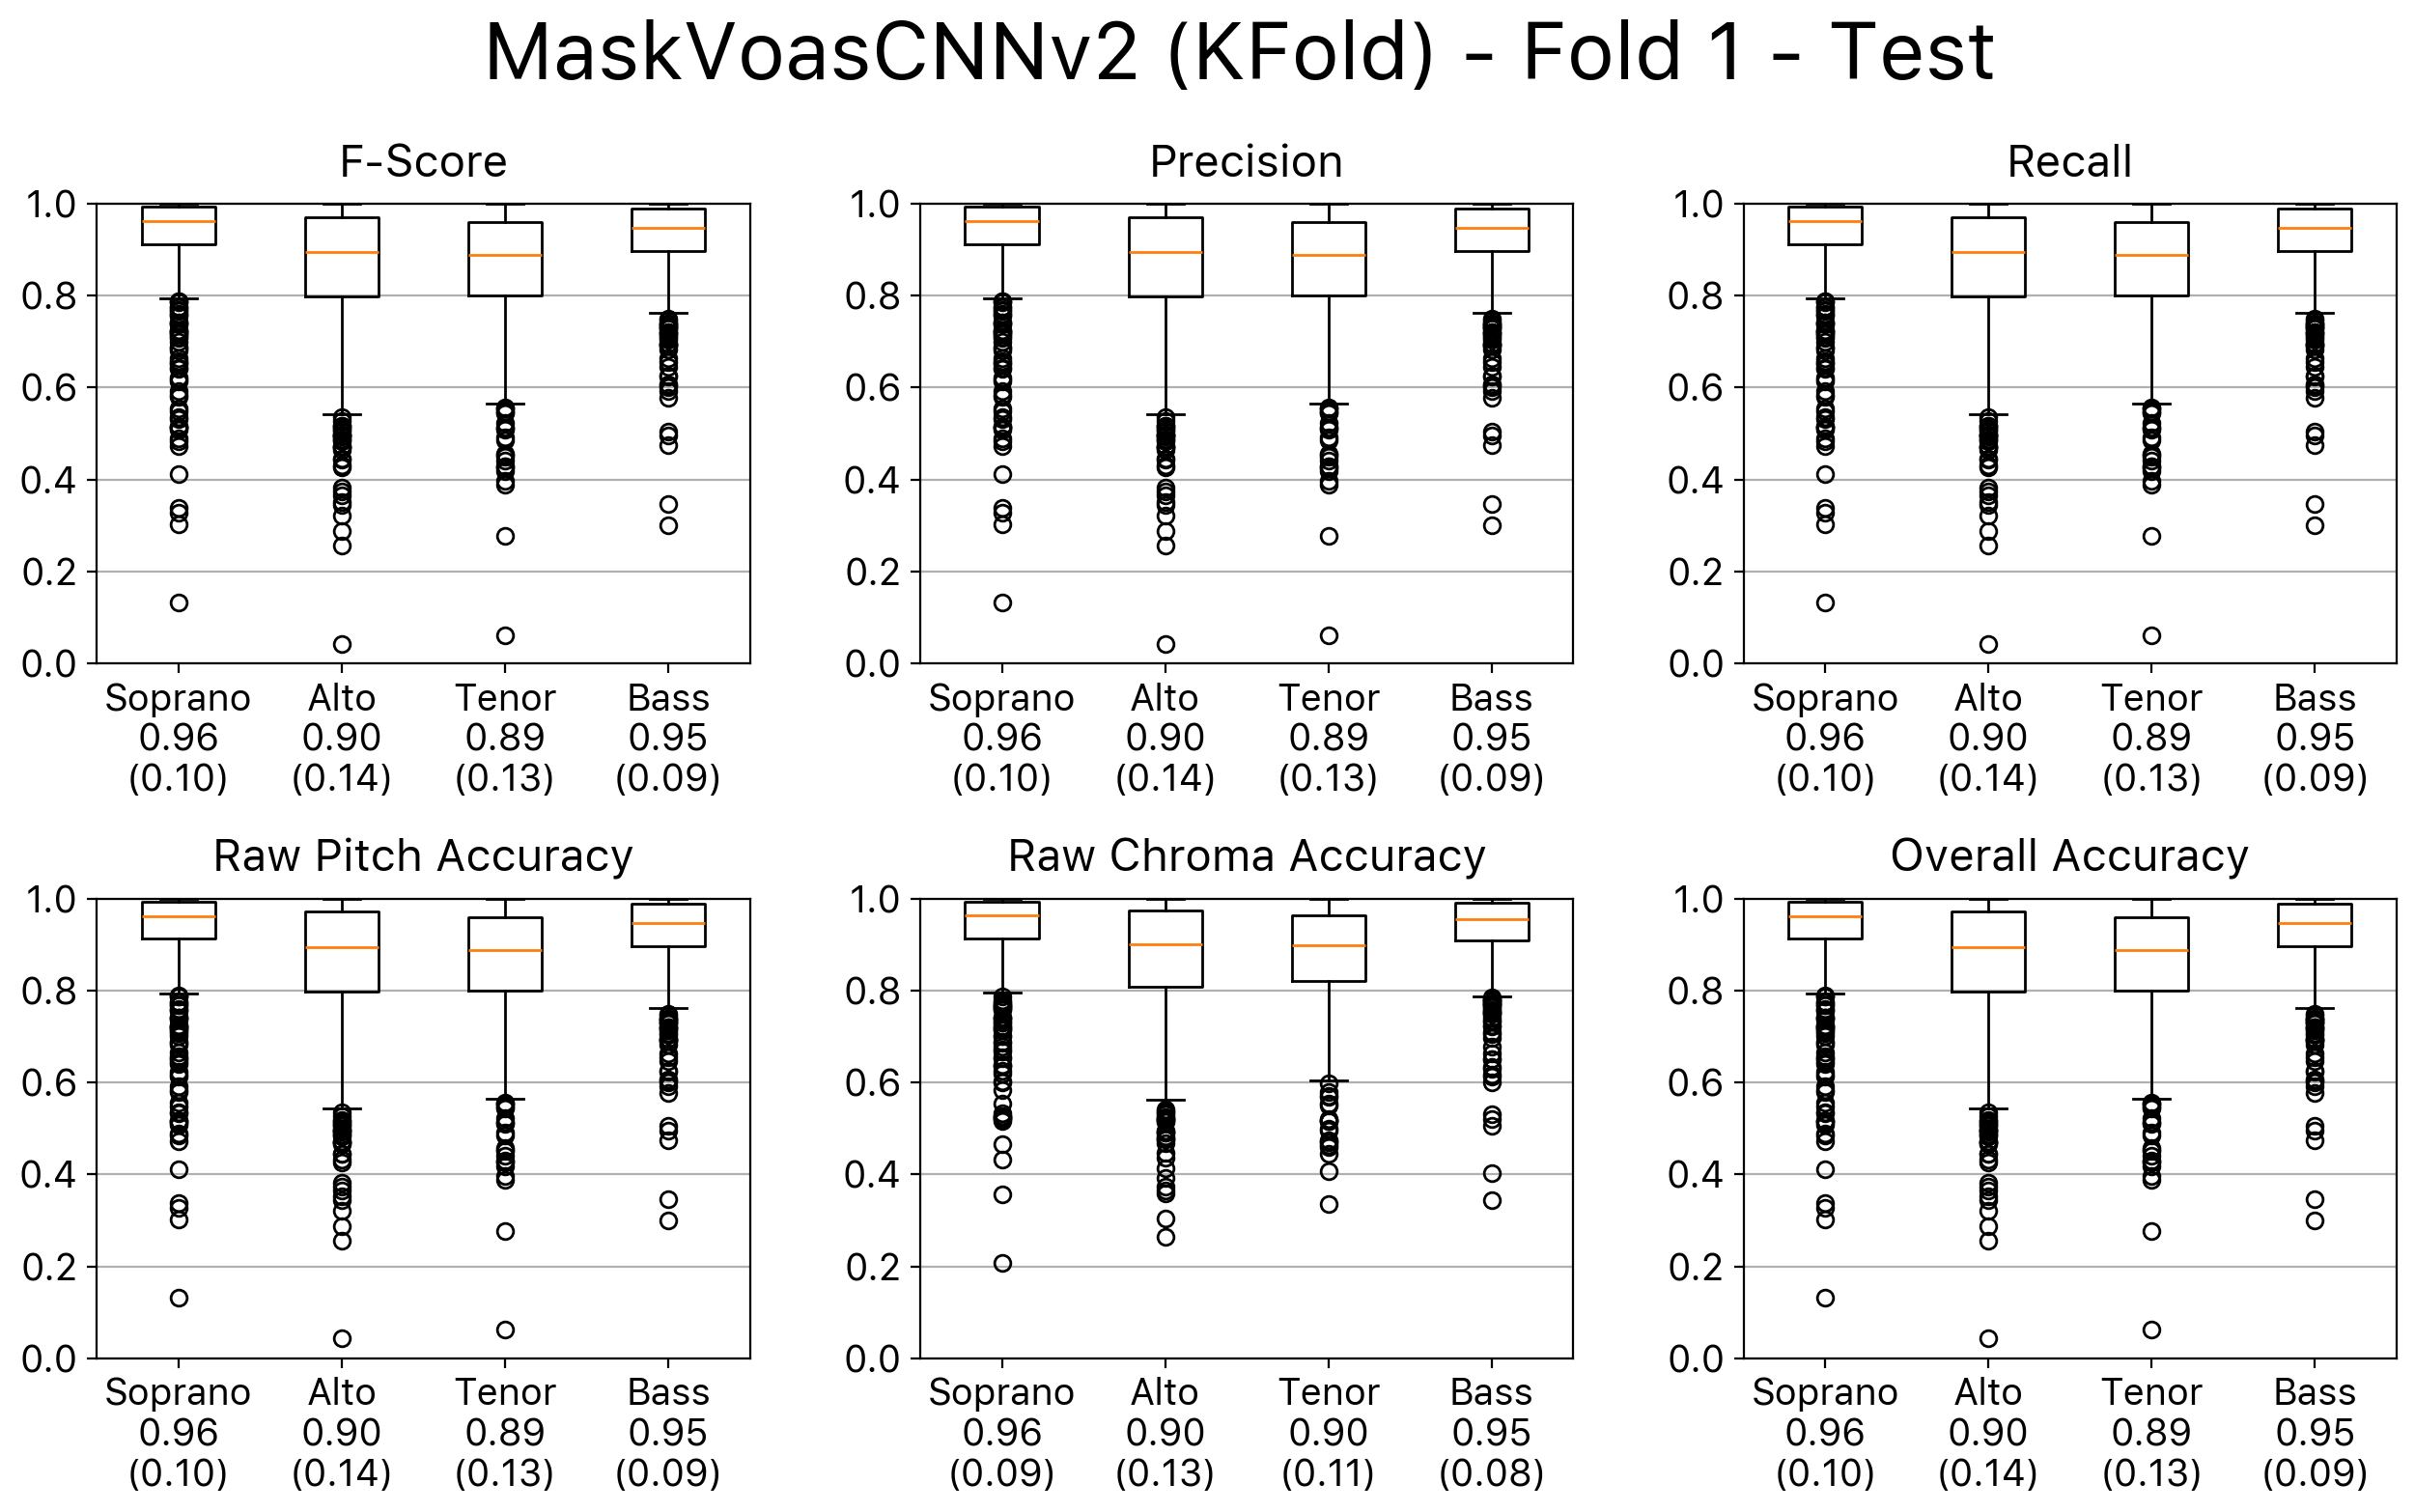

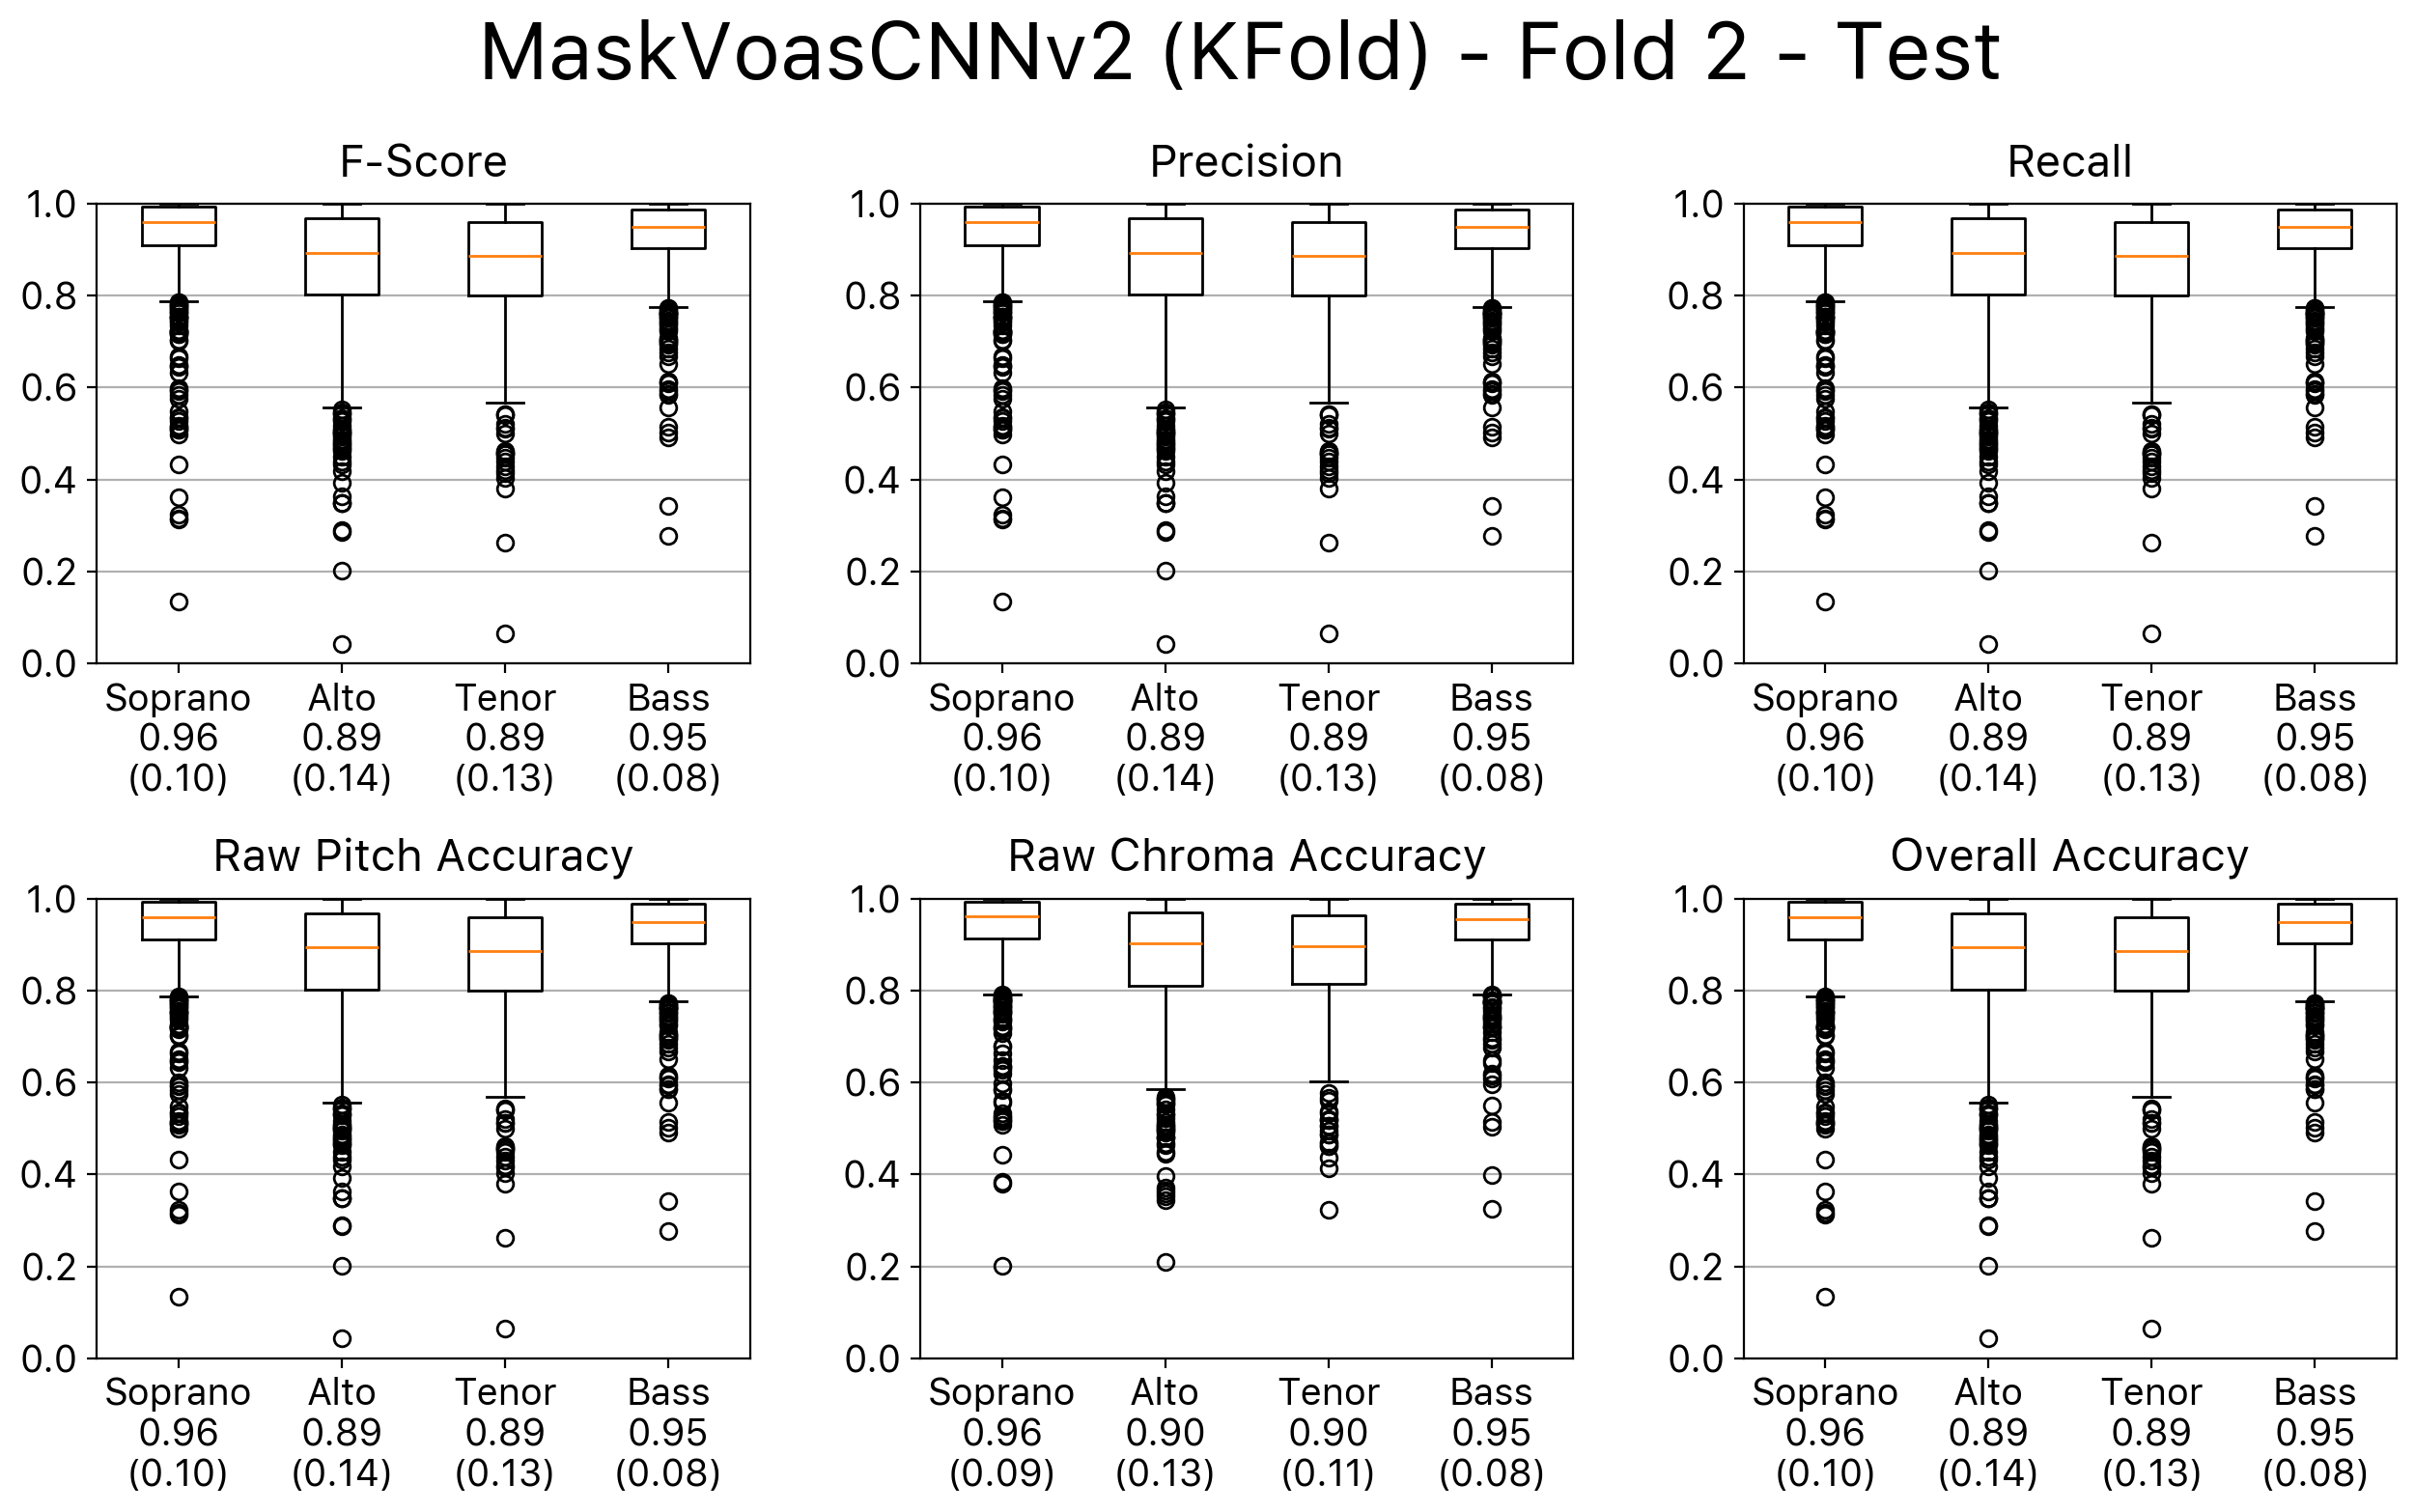

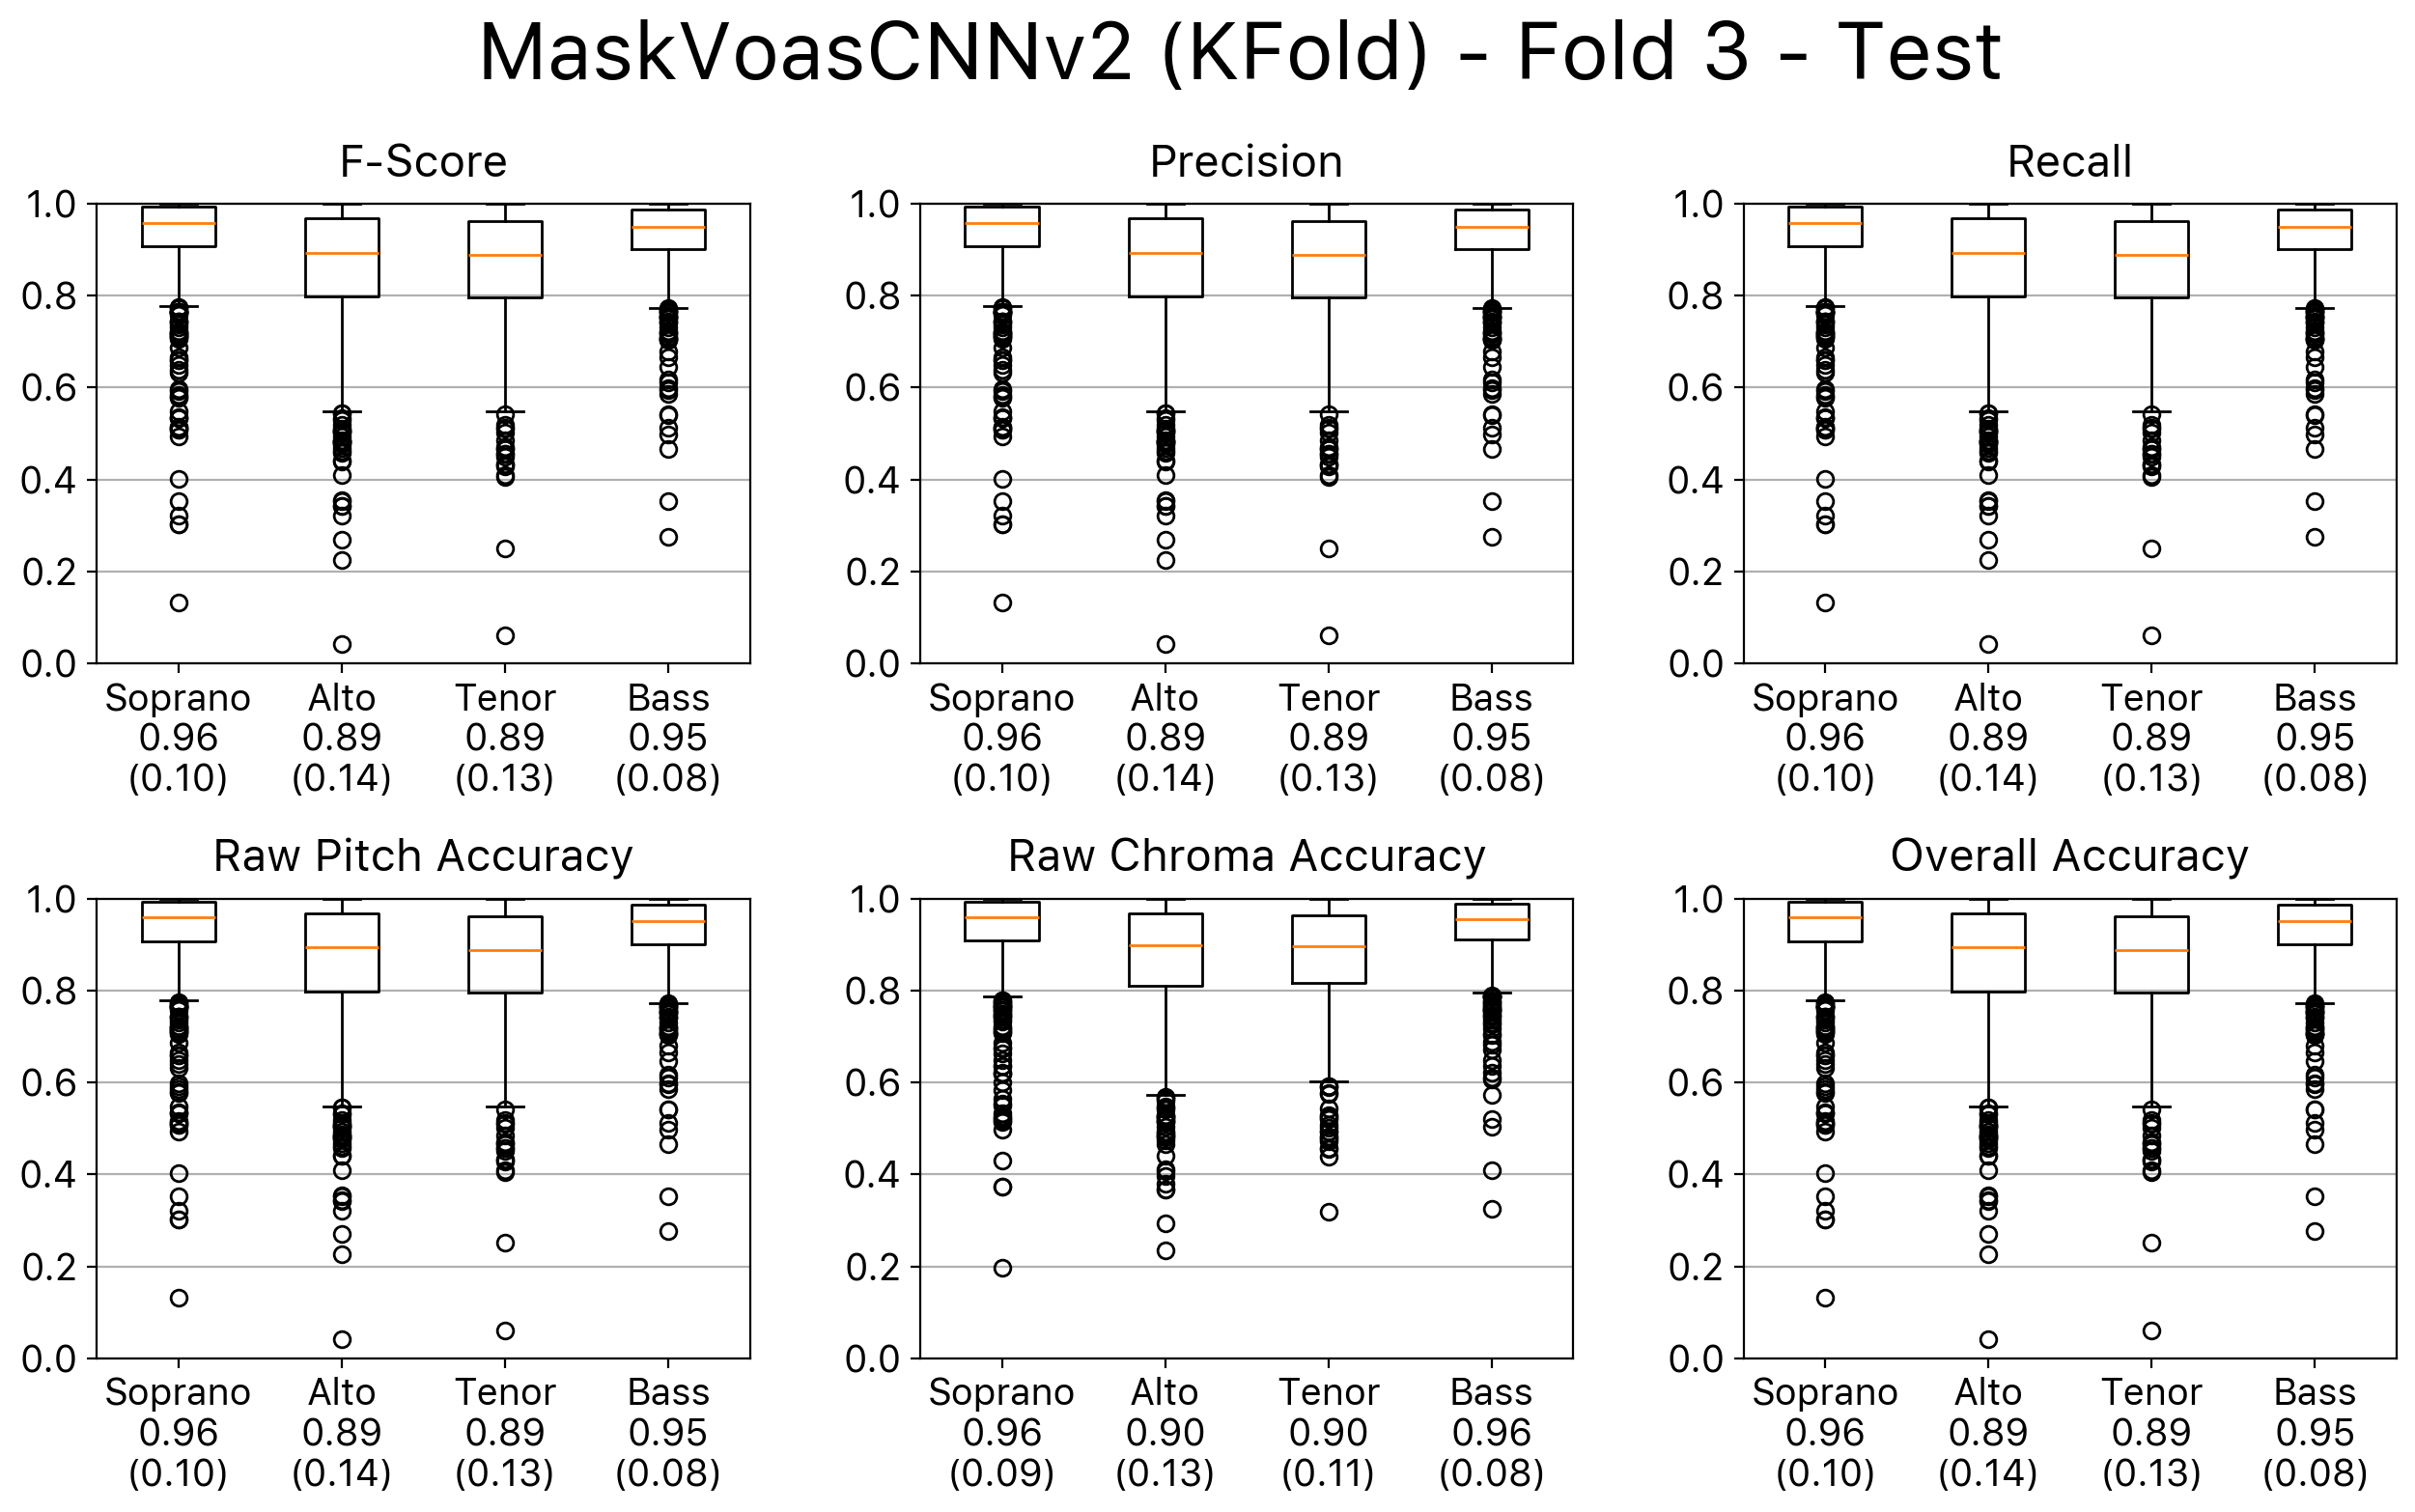

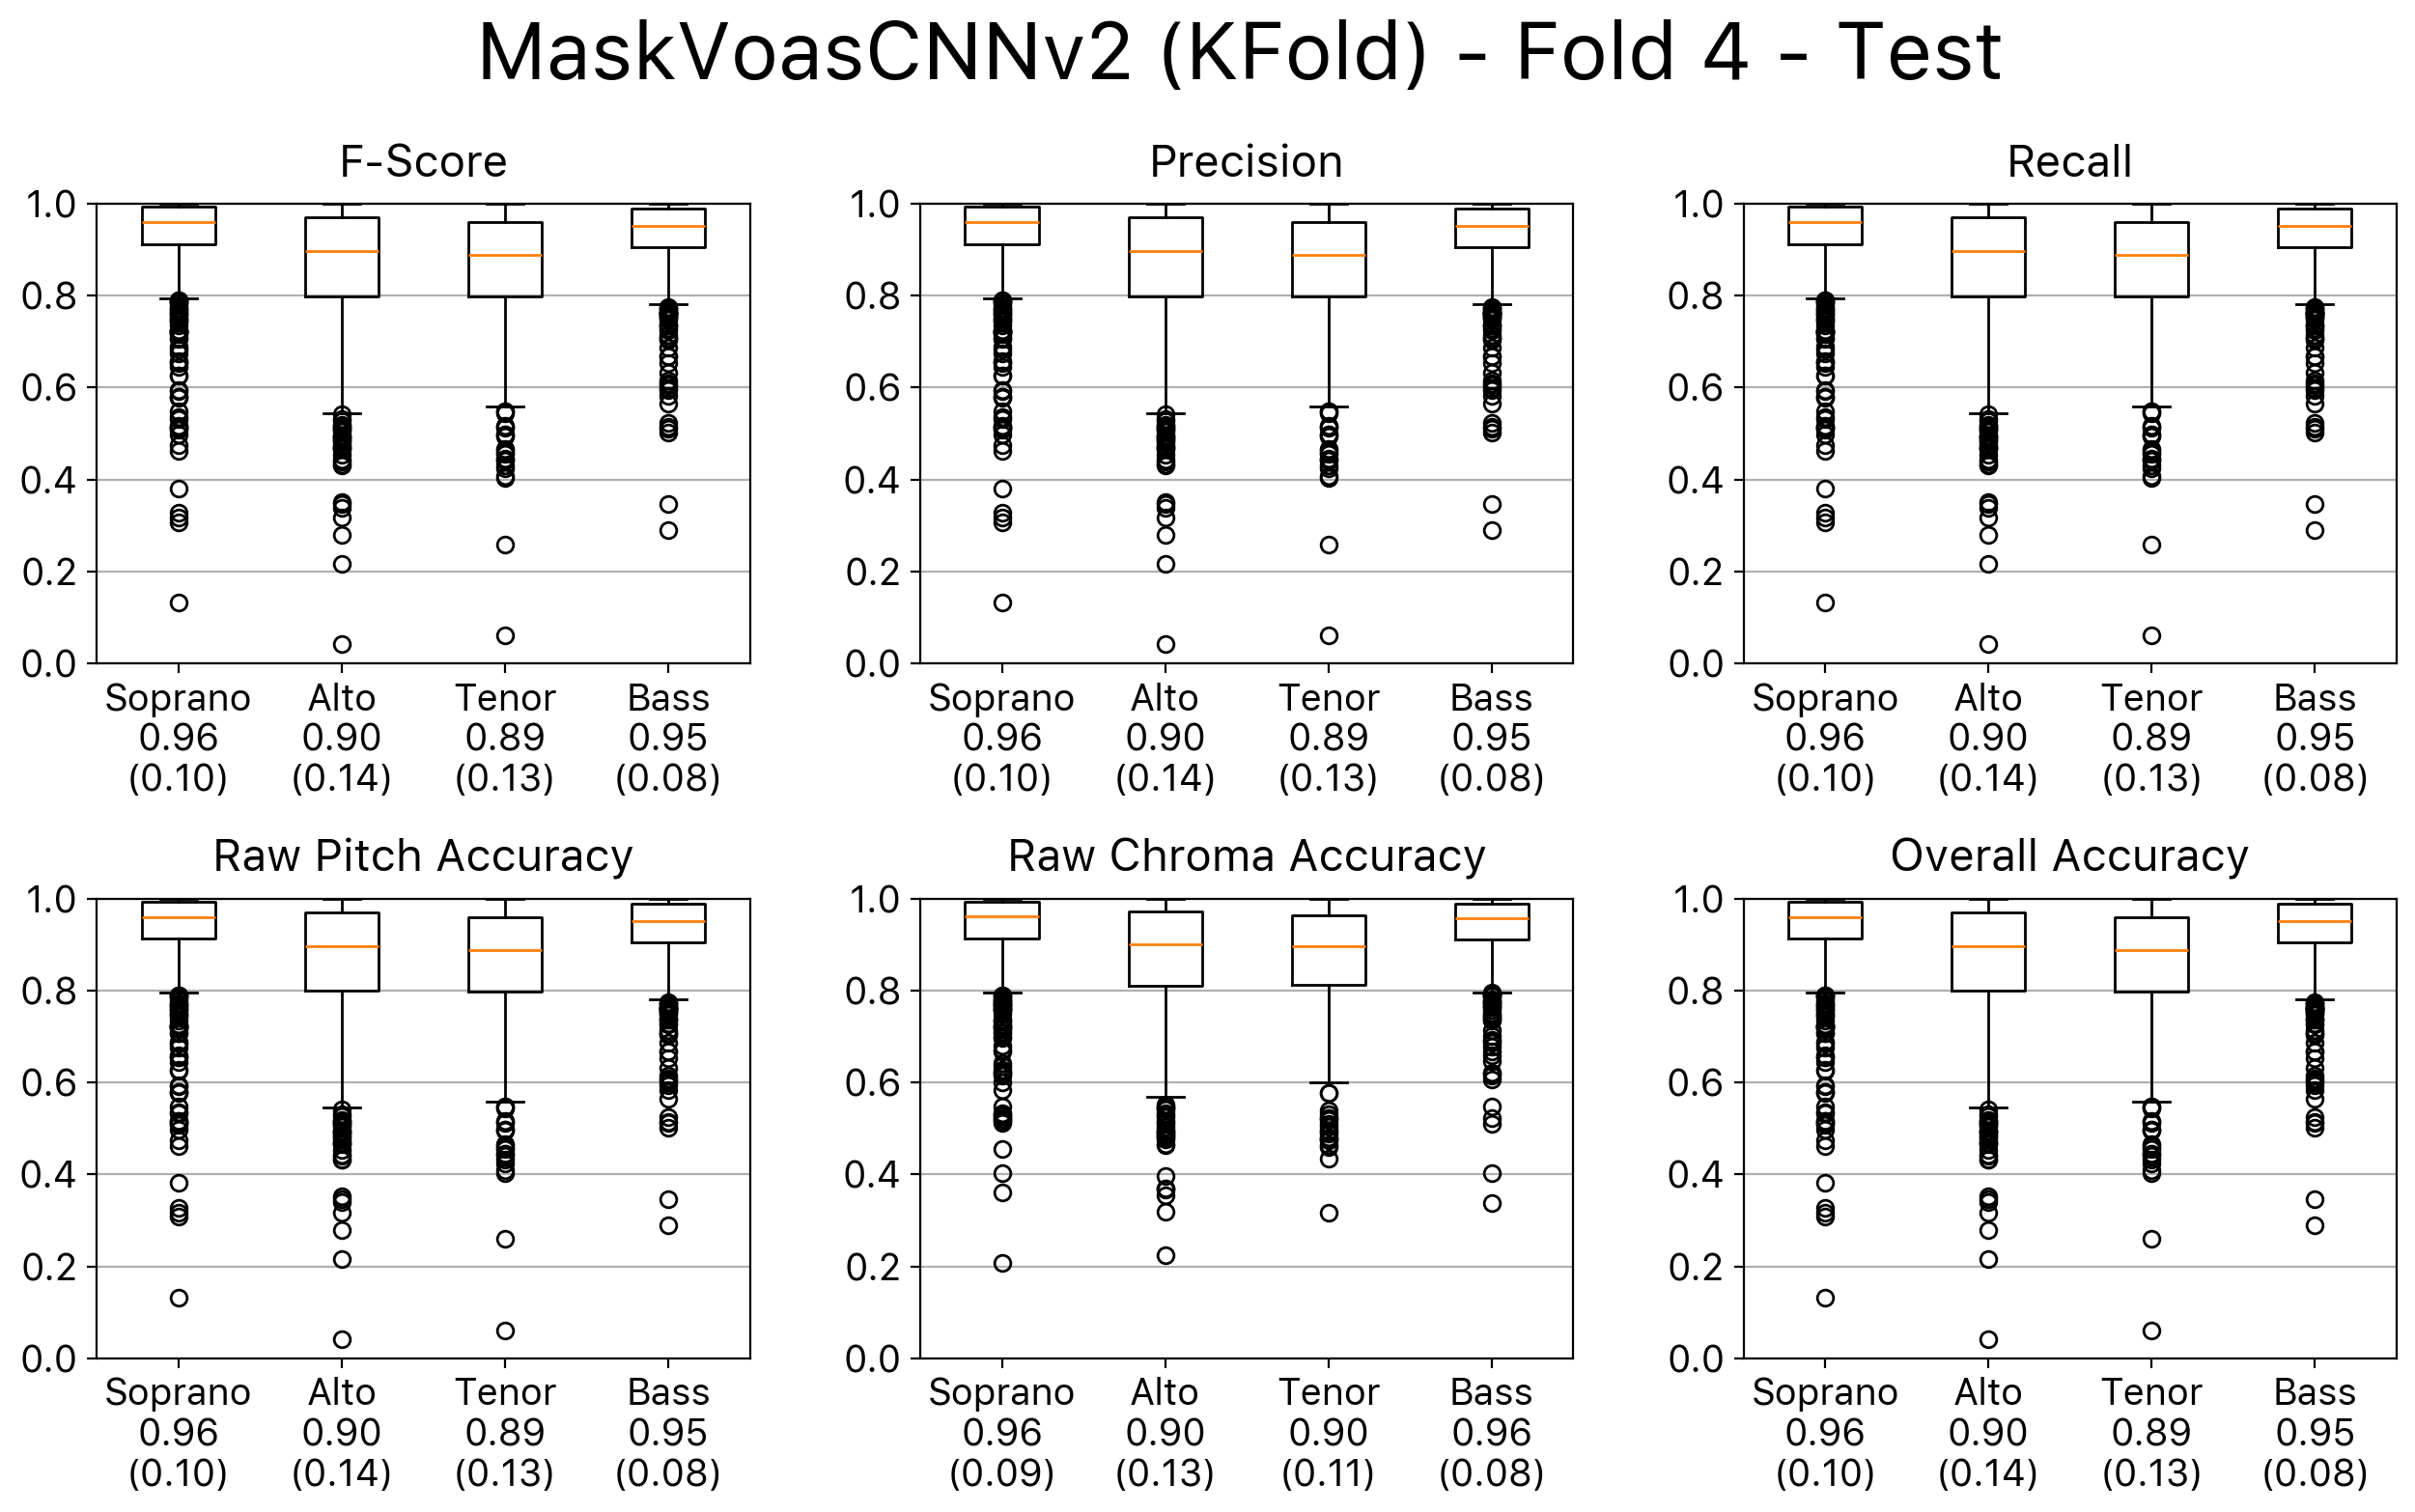

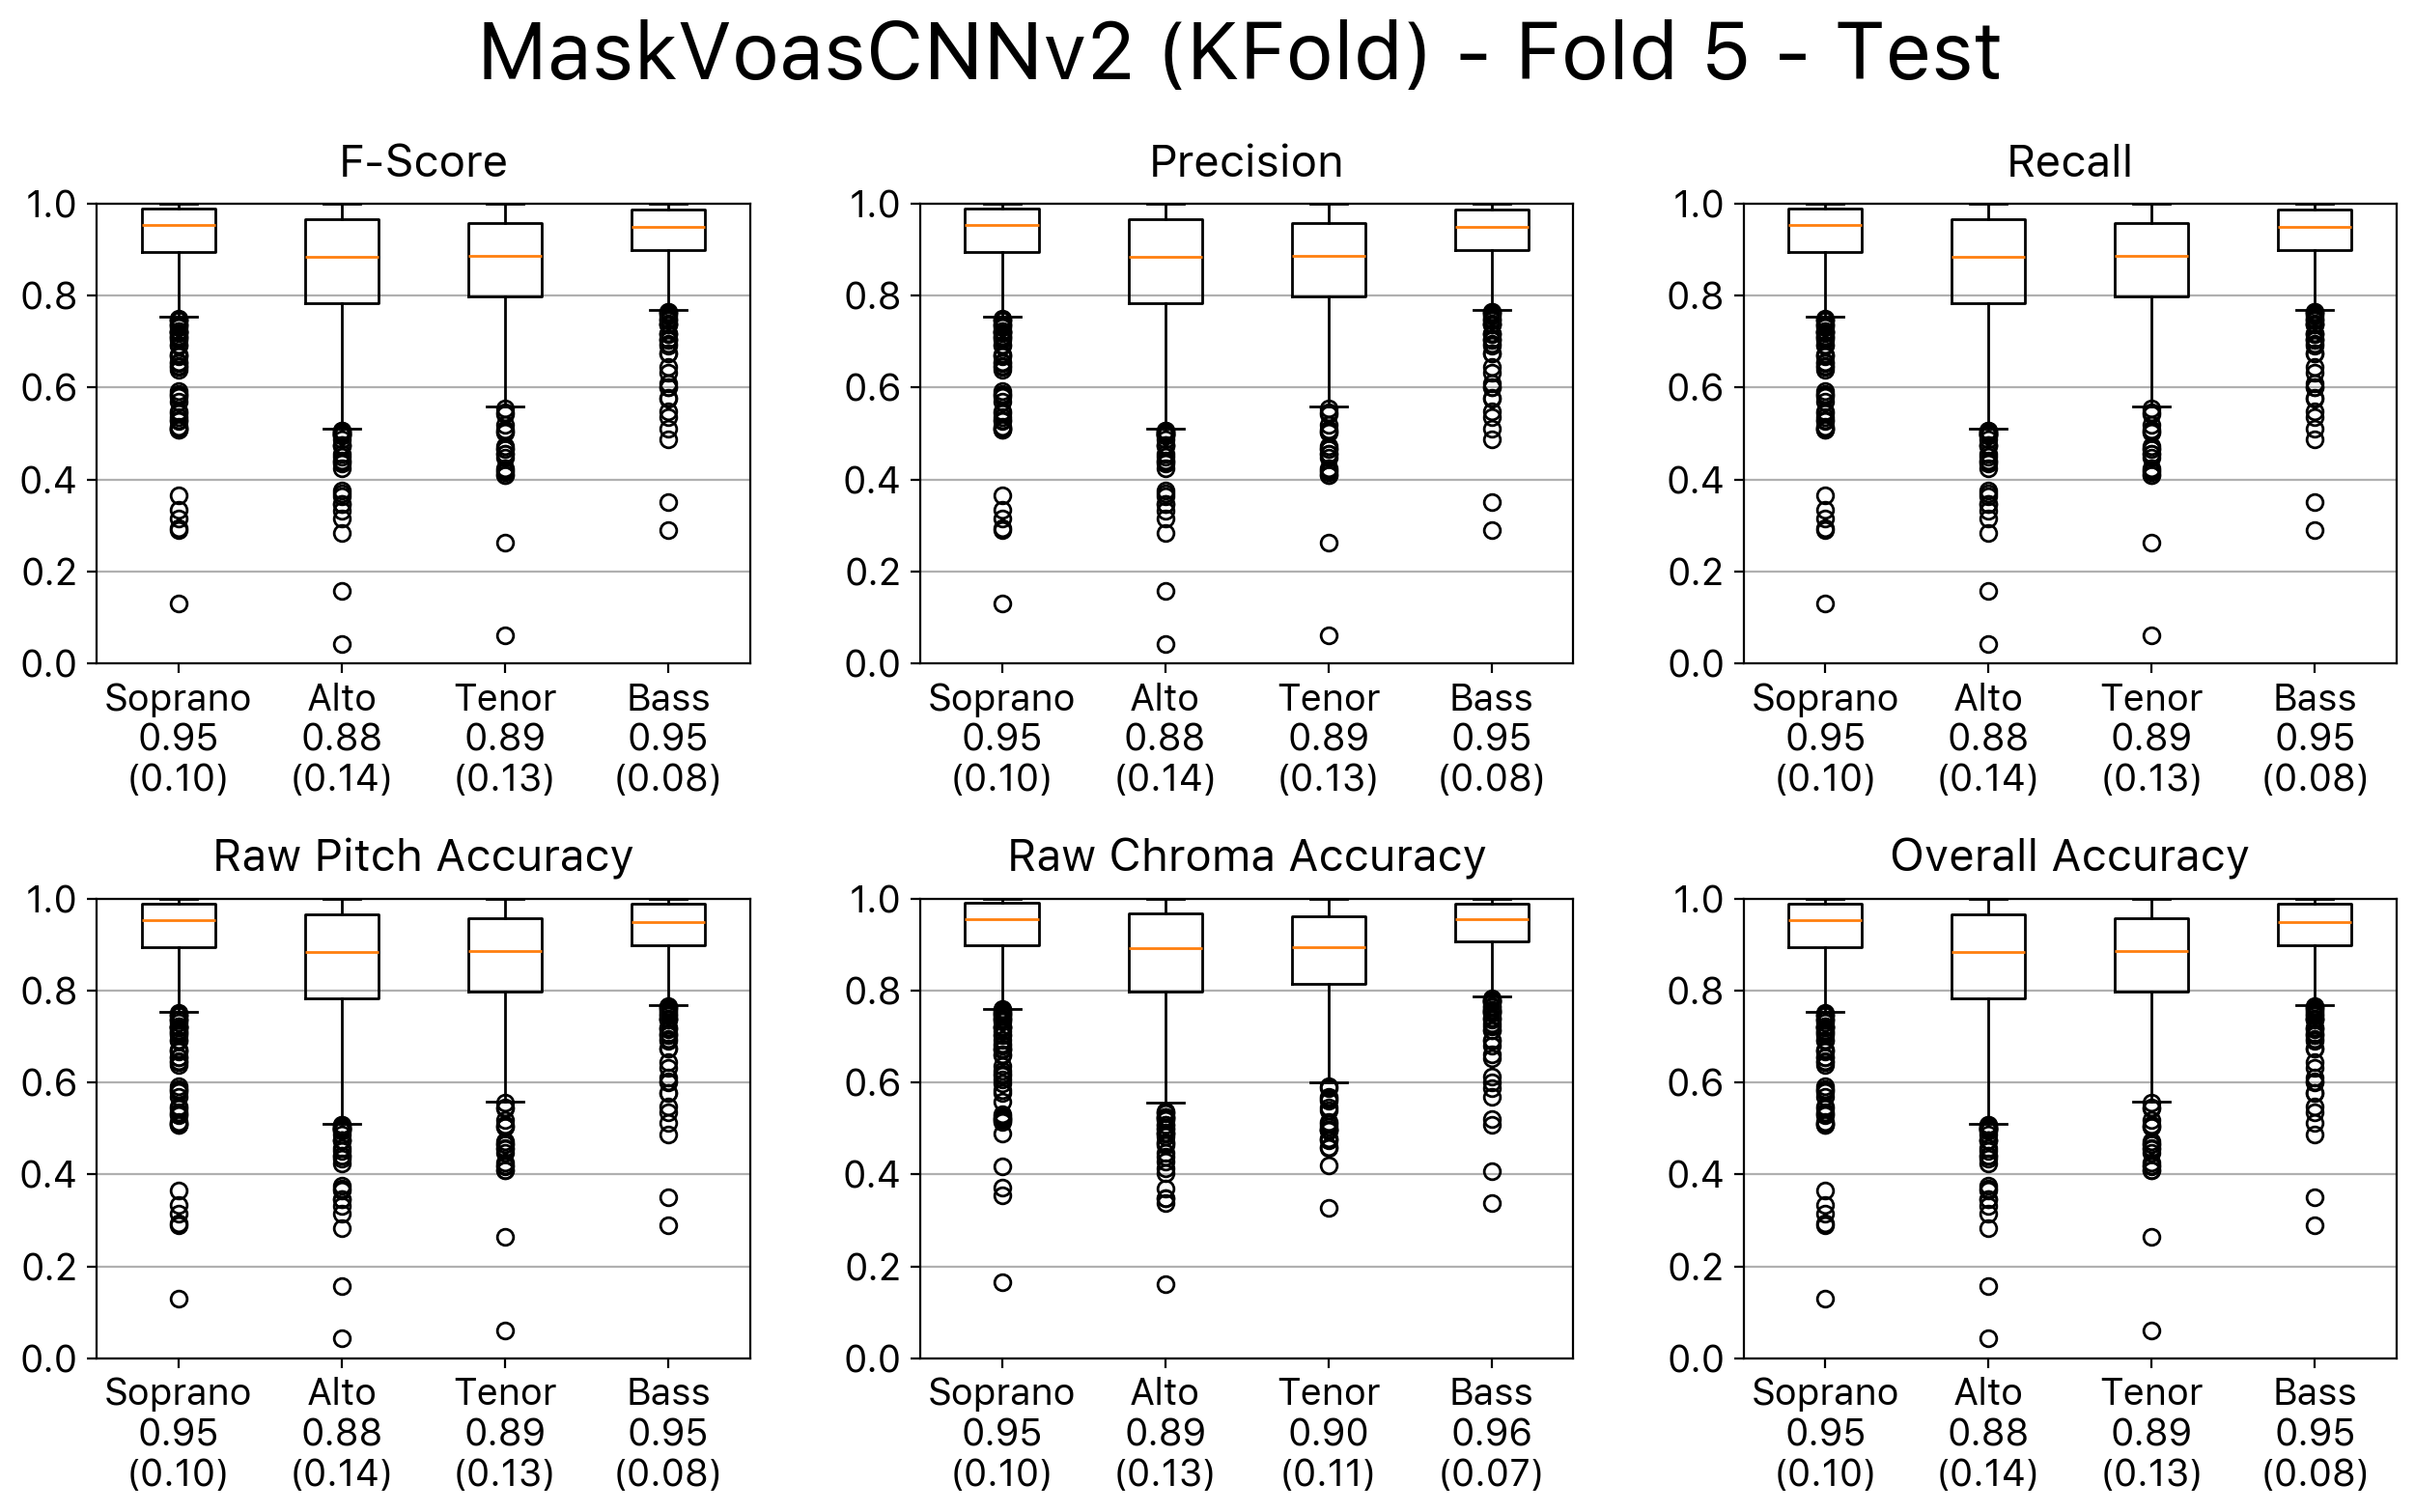

In [56]:
for i in range(1, FOLDS + 1):
    plot_test_metrics(TRAIN, i)